In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | ningan
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | ahipara
Processing Record 7 of Set 1 | narok
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | haapu
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | bonthe
Processing Record 14 of Set 1 | lamu
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | henties bay
Processing Record 21 of Set 1 | talnakh
Processing Recor

Processing Record 36 of Set 4 | matara
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | awbari
Processing Record 41 of Set 4 | biak
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | cayhagan
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | ginda
Processing Record 49 of Set 4 | male
Processing Record 50 of Set 4 | buala
Processing Record 1 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | bodaybo
Processing Record 7 of Set 5 | marawi
Processing Record 8 of Set 5 | kemlya
Processing Recor

Processing Record 25 of Set 8 | krasnogorsk
Processing Record 26 of Set 8 | mwense
Processing Record 27 of Set 8 | saint-augustin
Processing Record 28 of Set 8 | bristol
Processing Record 29 of Set 8 | kalmunai
Processing Record 30 of Set 8 | mrirt
City not found. Skipping...
Processing Record 31 of Set 8 | kuche
City not found. Skipping...
Processing Record 32 of Set 8 | juegang
Processing Record 33 of Set 8 | idar-oberstein
Processing Record 34 of Set 8 | mendahara
City not found. Skipping...
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 8 | estelle
Processing Record 40 of Set 8 | beringovskiy
Processing Record 41 of Set 8 | vega de alatorre
Processing Record 42 of Set 8 | naryan-mar
Processing Record 43 of Set 8 | port keats
Processing Record 44 of Set 8 | sakaraha
Processing Record 45 of Set 8 | sergeyevka
Pro

Processing Record 11 of Set 12 | bolshaya dzhalga
Processing Record 12 of Set 12 | seoul
Processing Record 13 of Set 12 | mtwango
Processing Record 14 of Set 12 | piracuruca
Processing Record 15 of Set 12 | guhagar
Processing Record 16 of Set 12 | puerto lleras
Processing Record 17 of Set 12 | wells
Processing Record 18 of Set 12 | chitral
Processing Record 19 of Set 12 | lashma
Processing Record 20 of Set 12 | praia da vitoria
Processing Record 21 of Set 12 | kumukh
Processing Record 22 of Set 12 | merauke
Processing Record 23 of Set 12 | fairbanks
Processing Record 24 of Set 12 | half moon bay
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 12 | san carlos
Processing Record 28 of Set 12 | lockport
Processing Record 29 of Set 12 | zharkovskiy
Processing Record 30 of Set 12 | sibolga
Processing Record 31 of Set 12 | wexford
Processing Record 32 of Set 12 | nouadhibou
Processing Record 33 of Set 1

In [13]:
len(city_data)

580

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,68.88,57,95,10.63,CA,2022-07-12 01:13:03
1,Muros,42.7762,-9.0603,69.55,65,0,6.80,ES,2022-07-12 01:13:03
2,Cape Town,-33.9258,18.4232,54.12,92,25,1.01,ZA,2022-07-12 01:12:19
3,Hilo,19.7297,-155.0900,85.28,68,40,12.66,US,2022-07-12 01:08:39
4,Ahipara,-35.1667,173.1667,59.58,86,8,18.32,NZ,2022-07-12 01:13:04
5,Narok,-1.0783,35.8601,50.43,98,42,5.41,KE,2022-07-12 01:13:04
6,Mataura,-46.1927,168.8643,45.48,87,100,10.60,NZ,2022-07-12 01:13:05
7,Ribeira Grande,38.5167,-28.7000,68.81,81,11,5.48,PT,2022-07-12 01:13:05
8,Pisco,-13.7000,-76.2167,61.02,82,40,10.36,PE,2022-07-12 01:13:06
9,Bonthe,7.5264,-12.5050,75.87,89,100,7.87,SL,2022-07-12 01:13:06


In [15]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-07-12 01:13:03,62.4560,-114.3525,68.88,57,95,10.63
1,Muros,ES,2022-07-12 01:13:03,42.7762,-9.0603,69.55,65,0,6.80
2,Cape Town,ZA,2022-07-12 01:12:19,-33.9258,18.4232,54.12,92,25,1.01
3,Hilo,US,2022-07-12 01:08:39,19.7297,-155.0900,85.28,68,40,12.66
4,Ahipara,NZ,2022-07-12 01:13:04,-35.1667,173.1667,59.58,86,8,18.32
5,Narok,KE,2022-07-12 01:13:04,-1.0783,35.8601,50.43,98,42,5.41
6,Mataura,NZ,2022-07-12 01:13:05,-46.1927,168.8643,45.48,87,100,10.60
7,Ribeira Grande,PT,2022-07-12 01:13:05,38.5167,-28.7000,68.81,81,11,5.48
8,Pisco,PE,2022-07-12 01:13:06,-13.7000,-76.2167,61.02,82,40,10.36
9,Bonthe,SL,2022-07-12 01:13:06,7.5264,-12.5050,75.87,89,100,7.87


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

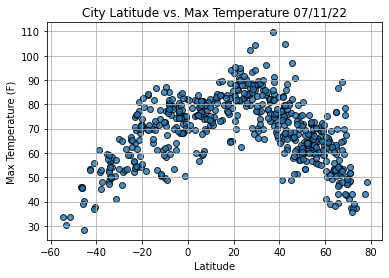

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

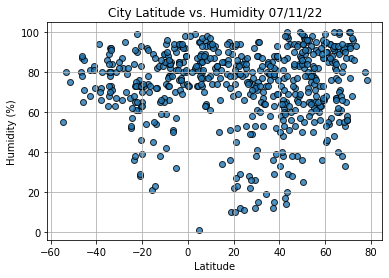

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

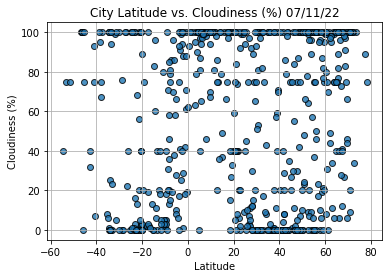

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

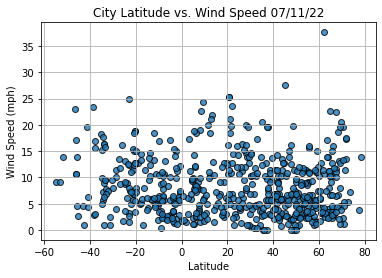

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-07-12 01:13:07
Lat                         -46.6
Lng                      168.3333
Max Temp                    45.81
Humidity                       80
Cloudiness                    100
Wind Speed                  23.04
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
575     True
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-07-12 01:13:03,62.4560,-114.3525,68.88,57,95,10.63
1,Muros,ES,2022-07-12 01:13:03,42.7762,-9.0603,69.55,65,0,6.80
3,Hilo,US,2022-07-12 01:08:39,19.7297,-155.0900,85.28,68,40,12.66
7,Ribeira Grande,PT,2022-07-12 01:13:05,38.5167,-28.7000,68.81,81,11,5.48
9,Bonthe,SL,2022-07-12 01:13:06,7.5264,-12.5050,75.87,89,100,7.87


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

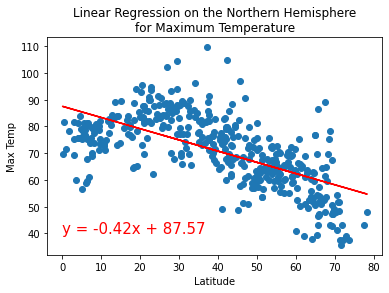

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(0,40))

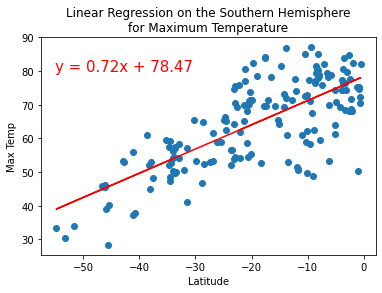

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-55,80))

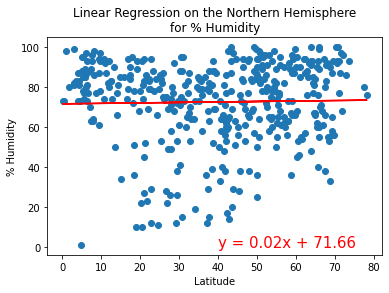

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,0))

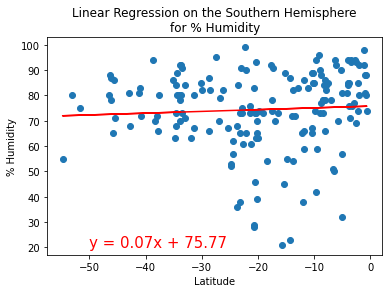

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,20))

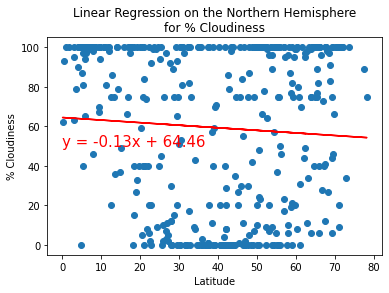

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(0,50))

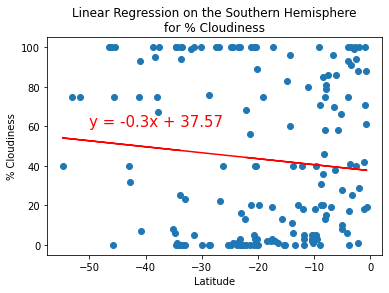

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

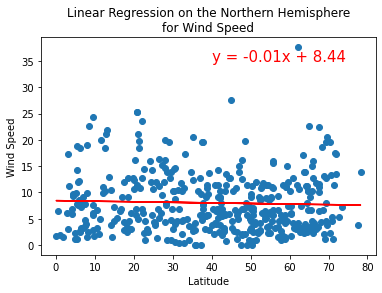

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

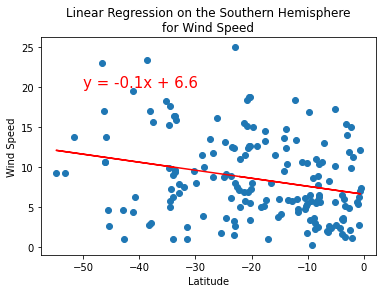

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,20))